In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings



# Read Excel file
import pandas as pd

df = pd.read_excel("/content/dataset.xlsx")  # Replace with actual uploaded file name


In [9]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Shape: (1118, 17)

Columns:
 Index(['Sl. No.', 'Incident Type', 'Location', 'Taluk',
       'Information Received From', 'Received Date/Time',
       'Incident Reported at', 'Action Taken By', 'Action Date/Time',
       'Action Remarks', 'Time taken to take Action', 'Closed By Officer',
       'Closed At', 'Closed Remarks', 'Time taken to Close', 'Photo Before',
       'Photo After'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl. No.                    1118 non-null   int64  
 1   Incident Type              1118 non-null   object 
 2   Location                   1112 non-null   object 
 3   Taluk                      1118 non-null   object 
 4   Information Received From  1118 non-null   object 
 5   Received Date/Time         1118 non-null   object 
 6   Incident Reported at   

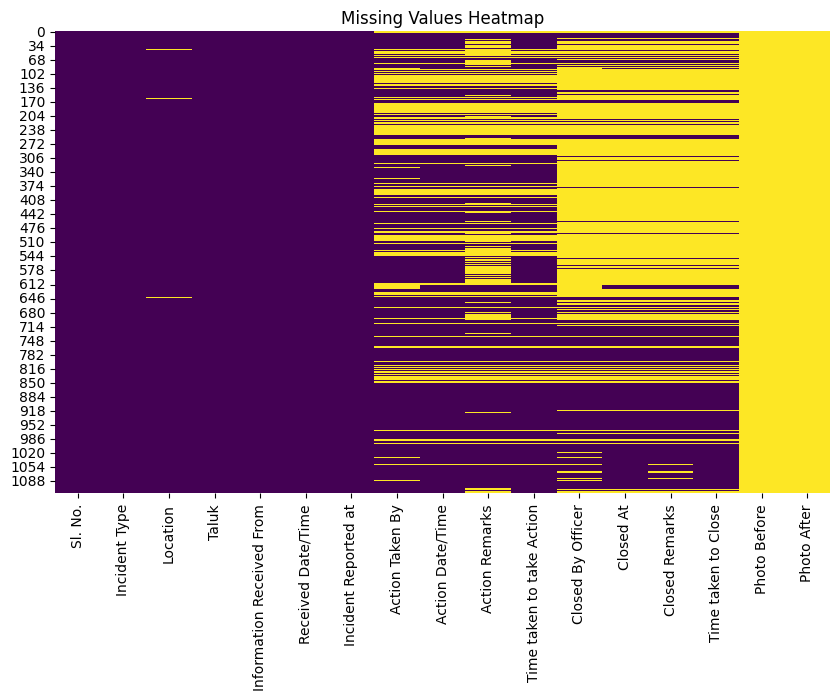

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
def inspect_columns(column_name):
    col = column_name  # Replace with actual column

    print(f"\nColumn: {col}")
    print("-" * 40)

    # 1. Basic info
    print("Unique values:", df[col].nunique())
    print("Value counts:\n", df[col].value_counts(dropna=False))
    print("\nData type:", df[col].dtype)
    print("\nMissing values:", df[col].isnull().sum())

    # 2. For object columns: check string length
    if df[col].dtype == 'object':
        print("\nMax length:", df[col].astype(str).str.len().max())
        print("Sample values:\n", df[col].dropna().unique()[:5])

    # 3. For numeric columns: describe
    if pd.api.types.is_numeric_dtype(df[col]):
        print("\nDescribe:\n", df[col].describe())

    # 4. For datetime columns: range
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        print("\nDate range:", df[col].min(), "to", df[col].max())


In [17]:
inspect_columns("Incident Type")


Column: Incident Type
----------------------------------------
Unique values: 14
Value counts:
 Incident Type
Landslide                     559
Tree fallen                   134
Others                         72
Building collapse              67
Mud slip                       60
Water logging                  58
Flood                          50
Bridge collapse                36
Road cut off                   34
Soil Erosion                   22
Electrical Poles fall down     20
Sea Erosion                     3
Road Accident                   2
Snake bite                      1
Name: count, dtype: int64

Data type: object

Missing values: 0

Max length: 26
Sample values:
 ['Others' 'Landslide' 'Tree fallen' 'Flood' 'Bridge collapse']


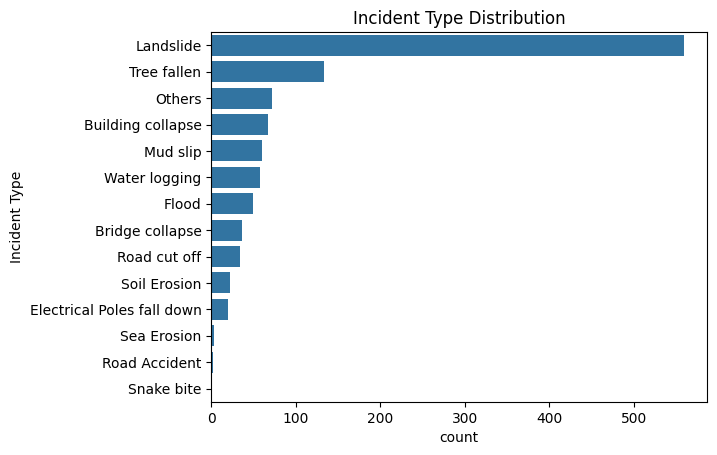

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df['Incident Type'], order=df['Incident Type'].value_counts().index)
plt.title("Incident Type Distribution")
plt.show()

### HANDLING LOCATION COLUMN


In [21]:
inspect_columns("Location")


Column: Location
----------------------------------------
Unique values: 905
Value counts:
 Location
12.692778 75.377586            9
Chembugudde                    8
Shirlalu                       7
Halekote                       7
BantwalMooda                   6
                              ..
padubailu sulkerimogru         1
okkala sulkerimogru            1
Mavinaktte Marodi              1
Keelampadi bettampady grama    1
Padnooru                       1
Name: count, Length: 906, dtype: int64

Data type: object

Missing values: 6

Max length: 126
Sample values:
 ['ಸರಕಾರಿ ಹಿರಿಯ ಪ್ರಾಥಮಿಕ ಶಾಲೆ ಬೆಳರಿಂಗೆ'
 'ಕಿನ್ಯಾ ಗ್ರಾಮದ ಮಜಲು ಎಂಬಲ್ಲಿ ಕಿಂಡಿ ಅಣೆಕಟ್ಟಿನ ಬಳಿ ಹೂಳು' 'Meenadi'
 'Near Kinya Grama Panchayath office' 'Naravi to Panal zp road']


In [23]:
!pip install deep-translator langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=28553272972e79ce4917b09255e60fdfa2fa795cae09e442d7392fb84703e17a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [22]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00


In [46]:
from deep_translator import GoogleTranslator
from langdetect import detect, LangDetectException
import pandas as pd

def translate_kannada_column_inplace(df, column_name, src='kn', target='en'):
    """
    Translates Kannada or non-ASCII text to English in-place for a specified column.
    Displays original vs translated examples where a change occurred.
    """
    original_values = df[column_name].copy()

    def is_ascii(text):
        return all(ord(char) < 128 for char in str(text))

    def safe_translate(text):
        if pd.isna(text) or str(text).strip() == '':
            return text  # Leave empty/NaN as-is
        try:
            lang = detect(text)
            if lang == 'kn' or not is_ascii(text):  # Translate Kannada or non-ASCII
                return GoogleTranslator(source=src, target=target).translate(text)
            else:
                return text  # Leave plain English untouched
        except LangDetectException:
            return text  # Return original if detection fails

    df[column_name] = df[column_name].apply(safe_translate)

    # Find changed entries
    changes = df[original_values != df[column_name]]
    changed_count = len(changes)

    print(f"\n✅ Total records changed in column '{column_name}': {changed_count}")
    print("\n🔄 Sample of changed records:")
    print(pd.DataFrame({
        'Original': original_values[changes.index],
        'Translated': df.loc[changes.index, column_name]
    }).head())

    return df


In [47]:
df = translate_kannada_column_inplace(df, 'Location')



✅ Total records changed in column 'Location': 15

🔄 Sample of changed records:
                Original             Translated
18                   NaN                    NaN
43                   NaN                    NaN
91                   NaN                    NaN
162                  NaN                    NaN
263  ತಾರಬರಿ kavalapaduru  Tarubari kavalapaduru


In [48]:

import re
import pandas as pd

def is_non_latin(text):
    if pd.isna(text) or str(text).strip() == '':
        return True  # Empty or NaN
    return bool(re.search(r'[^\u0000-\u007F]', str(text)))  # Non-ASCII (non-Latin) characters

def check_non_latin_or_empty_and_show(df, column_name):
    """
    Checks how many non-Latin (e.g., Kannada) or empty values are in the given column.
    Displays the rows with non-Latin or empty values.
    """
    non_latin_or_empty = df[df[column_name].apply(is_non_latin)]

    print(f"Non-Latin or empty values in '{column_name}': {len(non_latin_or_empty)}")
    print("\nSample of non-Latin or empty values:")
    print(non_latin_or_empty[[column_name]].drop_duplicates().head(100))

    return len(non_latin_or_empty), non_latin_or_empty


In [49]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Location')


Non-Latin or empty values in 'Location': 9

Sample of non-Latin or empty values:
                                           Location
18                                              NaN
669               Pattla Gandi Near Thanthrís House
953  Kukkaj̧e near Siddique House and Masjid Masjid
994                       Patla Near Thanthís House


In [50]:
print(df.loc[263, 'Location'])


Tarubari kavalapaduru


In [52]:
#filling missing values in location

def fill_missing_location(df):
    missing_before = df['Location'].isna().sum()

    # Apply row-wise fill logic
    df['Location'] = df.apply(
        lambda row: f"Unknown Location in {row['Taluk']}" if pd.isna(row['Location']) else row['Location'],
        axis=1
    )

    missing_after = df['Location'].isna().sum()
    filled_count = missing_before - missing_after

    print(f"\n✅ Missing 'Location' values filled: {filled_count}")
    return df


In [53]:
# Preview the changes
original_location_nulls = df[df['Location'].isna()]
df = fill_missing_location(df)
print("\nSample of newly filled locations:")
print(df.loc[original_location_nulls.index, ['Taluk', 'Location']])



✅ Missing 'Location' values filled: 6

Sample of newly filled locations:
           Taluk                         Location
18        Kadaba       Unknown Location in Kadaba
43   Belthangady  Unknown Location in Belthangady
91        Kadaba       Unknown Location in Kadaba
162  Belthangady  Unknown Location in Belthangady
643  Belthangady  Unknown Location in Belthangady
644  Belthangady  Unknown Location in Belthangady


In [54]:
inspect_columns("Location")



Column: Location
----------------------------------------
Unique values: 906
Value counts:
 Location
12.692778 75.377586            9
Chembugudde                    8
Halekote                       7
Shirlalu                       7
BantwalMooda                   6
                              ..
padubailu sulkerimogru         1
okkala sulkerimogru            1
Mavinaktte Marodi              1
Keelampadi bettampady grama    1
Padnooru                       1
Name: count, Length: 906, dtype: int64

Data type: object

Missing values: 0

Max length: 120
Sample values:
 ['Government Senior Primary School Beleringe'
 'Kindi Dam in Majalu, Kinya village' 'Meenadi'
 'Near Kinya Grama Panchayath office' 'Naravi to Panal zp road']


In [55]:
inspect_columns("Taluk")


Column: Taluk
----------------------------------------
Unique values: 10
Value counts:
 Taluk
Ullala                        320
Belthangady                   274
Buntwal                       169
Sullia                        111
Puttur                         82
Kadaba                         81
Mangaluru                      25
Mulki                          21
Mangaluru City Corporation     21
Mudabidri                      14
Name: count, dtype: int64

Data type: object

Missing values: 0

Max length: 26
Sample values:
 ['Ullala' 'Belthangady' 'Kadaba' 'Sullia' 'Buntwal']


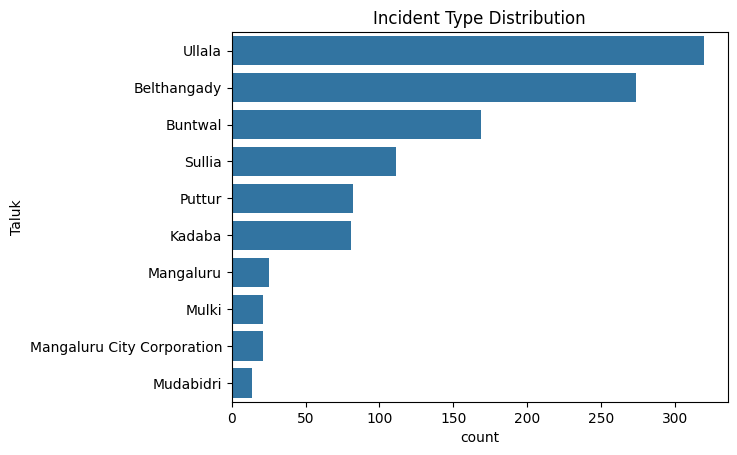

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df['Taluk'], order=df['Taluk'].value_counts().index)
plt.title("Incident Type Distribution")
plt.show()

### Information Received Columns

In [59]:
inspect_columns('Information Received From')


Column: Information Received From
----------------------------------------
Unique values: 727
Value counts:
 Information Received From
Pdo (9480862248)                           43
Secretary  (9480862361)                    16
GP President (8722877411)                  16
PUBLIC (9482034605)                        12
PDO Gp Mithabagilu (9902194520)            10
                                           ..
Rain (8217882424)                           1
ವಾರ್ಡು ಸದಸ್ಯರು (9686363278)                 1
ವಾರ್ಡು ಸದಸ್ಯರು (9686263278)                 1
public (9845256423)                         1
Grama panchayat bettampadi (9481243626)     1
Name: count, Length: 727, dtype: int64

Data type: object

Missing values: 0

Max length: 114
Sample values:
 ['Pdo (9480862507)' 'Member (9448152551)' 'PDO (9480862507)'
 'PDO (9480862231)' 'Pdo aladangady  (9480862200)']


In [60]:
import re
from deep_translator import GoogleTranslator
from langdetect import detect, LangDetectException

def clean_info_received_column(df, column='Information Received From'):
    original_col = df[column].copy()

    def extract_info(value):
        if pd.isna(value) or str(value).strip() == '':
            return ('Unknown', None)

        text = str(value).strip()


        # Extract phone number if available
        phone_match = re.search(r'\(?(\d{10})\)?', text)
        phone = phone_match.group(1) if phone_match else None

        # Remove phone number from text
        name = re.sub(r'\(?\d{10}\)?', '', text).strip()

        if not name:
            name = 'Unknown'

        # Normalize casing
        name = name.upper()

        return (name, phone)

    # Apply to each row
    df[['Info_Source', 'Info_Phone']] = df[column].apply(lambda x: pd.Series(extract_info(x)))

    print("\n✅ Cleaned 'Information Received From' into 'Info_Source' and 'Info_Phone'")
    print(df[['Information Received From', 'Info_Source', 'Info_Phone']].head(10))

    return df


In [61]:
clean_info_received_column(df)


✅ Cleaned 'Information Received From' into 'Info_Source' and 'Info_Phone'
      Information Received From     Info_Source  Info_Phone
0              Pdo (9480862507)             PDO  9480862507
1           Member (9448152551)          MEMBER  9448152551
2              PDO (9480862507)             PDO  9480862507
3              PDO (9480862507)             PDO  9480862507
4              PDO (9480862231)             PDO  9480862231
5  Pdo aladangady  (9480862200)  PDO ALADANGADY  9480862200
6              PDO (9480862231)             PDO  9480862231
7       PDO NARAVI (9480862231)      PDO NARAVI  9480862231
8        PDO balpa (9731683148)       PDO BALPA  9731683148
9  Pdo aladangady  (9480862200)  PDO ALADANGADY  9480862200


,Sl. No.,Incident Type,Location,Taluk,Information Received From,Received Date/Time,Incident Reported at,Action Taken By,Action Date/Time,Action Remarks,...,Closed By Officer,Closed At,Closed Remarks,Time taken to Close,Photo Before,Photo After,Location_translated,translation_changed,Info_Source,Info_Phone
0,1,Others,Government Senior Primary School Beleringe,Ullala,Pdo (9480862507),2024-12-08 20:30:01,2024-08-12 20:34:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Government Senior Primary School Beleringe,True,PDO,9480862507
1,2,Others,"Kindi Dam in Majalu, Kinya village",Ullala,Member (9448152551),2024-12-08 16:23:29,2024-08-12 16:32:39,Tulasi P,2024-08-12 16:34:14,Visited to site,...,Tulasi P,2024-08-12 16:46:52,ಪಂಚಾಯತ್ ವತಿಯಿಂದ ಹೂಳನ್ನು ತೆರವುಗೊಳಿಸಲಾಗಿರುತ್ತದೆ,0h 14m 13s,NaN,NaN,"Kindi Dam in Majalu, Kinya village",True,MEMBER,9448152551
2,3,Others,Meenadi,Ullala,PDO (9480862507),2024-12-08 16:15:31,2024-08-12 16:22:38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Meenadi,False,PDO,9480862507
3,4,Landslide,Near Kinya Grama Panchayath office,Ullala,PDO (9480862507),2024-12-08 15:59:10,2024-08-12 16:08:37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Near Kinya Grama Panchayath office,False,PDO,9480862507
4,5,Tree fallen,Naravi to Panal zp road,Belthangady,PDO (9480862231),2024-12-08 15:21:34,2024-08-12 15:24:44,Sudhakar D,2024-08-12 15:31:37,Due to heavy rain trees fallen across the Nara...,...,Sudhakar D,2024-08-12 15:34:01,Fallen trees removed by machinary &manual labour.,0h 9m 17s,NaN,NaN,Naravi to Panal zp road,False,PDO,9480862231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,1114,Landslide,Sheeyadakodi,Belthangady,Guruprasad (9880724132),2024-01-08 16:16:58,2024-08-14 16:21:10,Ravi Ningana,2024-08-14 16:22:51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sheeyadakodi,False,GURUPRASAD,9880724132
1114,1115,Landslide,Kadirudyavara,Belthangady,Savitri (9611649285),2024-01-08 16:15:58,2024-08-09 16:18:07,Ravi Ningana,2024-08-09 16:19:12,Land slide,...,NaN,NaN,NaN,NaN,NaN,NaN,Kadirudyavara,False,SAVITRI,9611649285
1115,1116,Mud slip,Shettipal,Belthangady,Shali (9581346883),2024-01-08 13:10:15,2024-08-14 13:15:34,Ravi Ningana,2024-08-14 13:17:39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Shettipal,False,SHALI,9581346883
1116,1117,Mud slip,Erumalpalke,Belthangady,Ramesh poojary (8971159857),2024-01-08 12:02:43,2024-08-12 12:16:20,Ravi Ningana,2024-08-12 12:25:10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Erumalpalke,False,RAMESH POOJARY,8971159857


In [66]:
inspect_columns('Info_Source')


Column: Info_Source
----------------------------------------
Unique values: 474
Value counts:
 Info_Source
PUBLIC                                             167
PDO                                                 76
SELF                                                41
WARD CONCILLOR                                      30
PDO ALADANGADY                                      20
                                                  ... 
It is possible to take effect on the hill house      1
LAXMANA GOWDA                                        1
IBRAHIM                                              1
RAMANANDA BHAT                                       1
RAIN                                                 1
Name: count, Length: 474, dtype: int64

Data type: object

Missing values: 0

Max length: 101
Sample values:
 ['PDO' 'MEMBER' 'PDO ALADANGADY' 'PDO NARAVI' 'PDO BALPA']


In [64]:
df = translate_kannada_column_inplace(df, 'Info_Source')



✅ Total records changed in column 'Info_Source': 39

🔄 Sample of changed records:
                                              Original  \
18                                               ಚೇತನ್   
19                          ದಮಯಂತಿ ಅಂಗನವಾಡಿ ಕಾರ್ಯಕರ್ತೆ   
22                                           ಅಣ್ಣು ಗೌಡ   
60   ಪಡಂಗಡಿ ಗ್ರಾಮದ ಮಲ್ಲಿಪಾಡಿ ಅಮರನಾಥ ಹೆಗ್ಡೆ ಬಿನ್ ಜಿನ...   
267  ಪಂಚಾಯತ್ ಅಭಿವೃದ್ಧಿ ಅಧಿಕಾರಿ ಮುತ್ತೂರು ಗ್ರಾಮ ಪಂಚಾಯತ್‌   

                                            Translated  
18                                              Chetan  
19                        Damayanti Anganwadi activist  
22                                            Pantheon  
60   Mallipady Amarnath Hegde bin Jinaraja Hegde's ...  
267  Panchayat Development Officer Muttur Gram Panc...  


In [65]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Location')


Non-Latin or empty values in 'Location': 3

Sample of non-Latin or empty values:
                                           Location
669               Pattla Gandi Near Thanthrís House
953  Kukkaj̧e near Siddique House and Masjid Masjid
994                       Patla Near Thanthís House


### Incident Reported at

In [71]:
inspect_columns("Incident Reported at")


Column: Incident Reported at
----------------------------------------
Unique values: 1094
Value counts:
 Incident Reported at
2024-08-12 16:28:32    4
2024-08-13 12:09:18    2
2024-07-24 13:14:41    2
2024-07-24 13:19:52    2
2024-07-01 10:31:50    2
                      ..
2024-08-14 14:02:56    1
2024-08-14 14:04:47    1
2024-08-14 14:07:12    1
2024-08-14 14:09:21    1
2024-08-14 13:41:13    1
Name: count, Length: 1094, dtype: int64

Data type: datetime64[ns]

Missing values: 0

Date range: 2024-06-27 14:27:10 to 2024-09-24 11:49:23


In [68]:
df['Incident Reported at'] = pd.to_datetime(df['Incident Reported at'], errors='coerce')


## ACTION TAKEN BY COLUMN

In [77]:
inspect_columns('Action Taken By')


Column: Action Taken By
----------------------------------------
Unique values: 115
Value counts:
 Action Taken By
NaN                 327
Smt.Vani V Alva     165
Keshava K            50
Vasantha Poojary     27
Leena Bitto          24
                   ... 
Kashinatha            1
Devaki                1
Eo_Bantwal            1
Pankaja               1
Shrishail Donur       1
Name: count, Length: 116, dtype: int64

Data type: object

Missing values: 327

Max length: 26
Sample values:
 ['Tulasi P' 'Sudhakar D' 'Poornima. J' 'Narayana B' 'Santhosh Patil']


In [76]:
df['Action Taken By'] = df['Action Taken By'].str.strip().str.title()


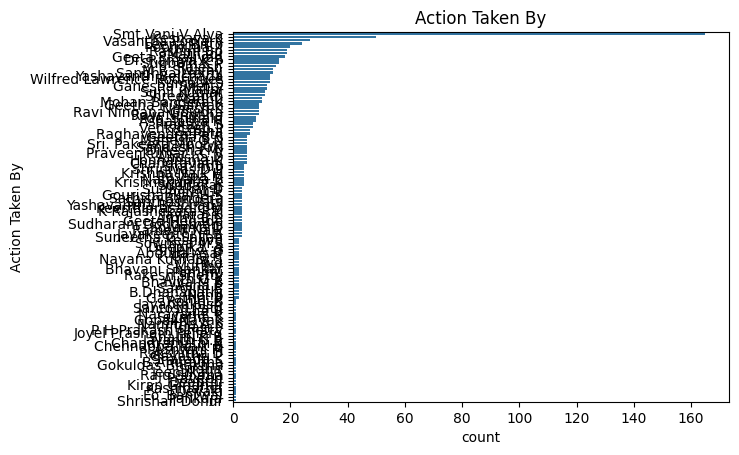

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df['Action Taken By'], order=df['Action Taken By'].value_counts().index)
plt.title("Action Taken By")
plt.show()

In [79]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Action Taken By')


Non-Latin or empty values in 'Action Taken By': 327

Sample of non-Latin or empty values:
  Action Taken By
0             NaN


## ACTION REMARKS COLUMN


In [80]:
inspect_columns('Action Remarks')


Column: Action Remarks
----------------------------------------
Unique values: 417
Value counts:
 Action Remarks
NaN                                                                              452
Attended                                                                          26
Land Slide                                                                        24
ಕೃತಕ ನೆರೆ                                                                         23
Water logging                                                                     20
                                                                                ... 
Road closed                                                                        1
Tree felt on the electrical service wire at Subhash Nagara in Ullal CMC limit      1
warned the residents to evacuate the Kalaji Centre.                                1
test                                                                               1
ಮನೆಯ ಒಂದು ಬದಿ ಗೋಡೆ ಕುಸಿತ            

In [83]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Action Remarks')

Non-Latin or empty values in 'Action Remarks': 634

Sample of non-Latin or empty values:
                                        Action Remarks
0                                                  NaN
17                        ತಡೆಗೋಡೆ ಕುಸಿದು ಬಿದ್ದಿರುತ್ತದೆ
22   ಬಳ್ಪ ಗ್ರಾಮ ಪಂಚಾಯತ್ ವ್ಯಾಪ್ತಿಯ ಕೇನ್ಯ ಗ್ರಾಮದ ಪೇರಳ...
28   ಸ್ಥಳಕ್ಕೆ ಅಧ್ಯಕ್ಷರು ಹಾಗೂ ವಾರ್ಡಿನ ಸದಸ್ಯರೊಂದಿಗೆ ಭ...
50                 ರಸ್ತೆಗೆ ಅಡ್ಡಲಾಗಿ ಮರ ಬದ್ದಿರುವ ಬಗ್ಗೆ 
..                                                 ...
940  ಬಂಟ್ವಾಳ ಪುರಸಭಾ ವ್ಯಾಪ್ತಿಯ ಪಾಣೆಮಂಗಳೂರು ಗ್ರಾಮದ ಆಲ...
959  ರಸ್ತೆಗೆ ಬಿದ್ದ ಮರದ ಕೊಂಬೆಗಳನ್ನು ತೆರವುಗೊಳಿಸಲಾಗಿದೆ...
962  ಅಪಾಯಕಾರಿ ಮರವಿದ್ದು ಮನೆಯ ಮೇಲೆ ಬಿದ್ದು ಹಾನಿಯಾಗುವ ಸಂಭವ
969                             ಕಾರಿನ ಮೇಲೆ ಮರ ಬಿದ್ದಿದೆ
972  ಸದ್ರಿ ದೂರಿನ ಬಗ್ಗೆ ದಿನಾಂಕ 16.07.24 ರಂದು ಗ್ರಾಮ ಪ...

[100 rows x 1 columns]


In [84]:
df = translate_kannada_column_inplace(df, 'Action Remarks')



✅ Total records changed in column 'Action Remarks': 634

🔄 Sample of changed records:
                        Original                Translated
0                            NaN                       NaN
2                            NaN                       NaN
3                            NaN                       NaN
8                            NaN                       NaN
17  ತಡೆಗೋಡೆ ಕುಸಿದು ಬಿದ್ದಿರುತ್ತದೆ  The barrier is collapsed


In [85]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Action Remarks')

Non-Latin or empty values in 'Action Remarks': 452

Sample of non-Latin or empty values:
  Action Remarks
0            NaN


In [86]:
inspect_columns("Time taken to take Action")


Column: Time taken to take Action
----------------------------------------
Unique values: 461
Value counts:
 Time taken to take Action
NaN             305
0h 0m 26s        10
0h 0m 22s        10
0h 0m 44s         9
0h 0m 58s         9
               ... 
0h 11m 48s        1
1h 6m 8s          1
0h 25m 54s        1
0h 29m 57s        1
116h 59m 43s      1
Name: count, Length: 462, dtype: int64

Data type: object

Missing values: 305

Max length: 12
Sample values:
 ['0h 1m 35s' '0h 6m 53s' '0h 1m 19s' '0h 6m 6s' '0h 29m 57s']


In [87]:
inspect_columns("Closed By Officer")


Column: Closed By Officer
----------------------------------------
Unique values: 86
Value counts:
 Closed By Officer
NaN                663
Smt.Vani V Alva    149
Mathadi             19
Sandhya Laxmi       14
Leena Bitto         14
                  ... 
Chandravathi         1
PANKAJA              1
SOWMYA M.S           1
Subbaih K P          1
Shrishail Donur      1
Name: count, Length: 87, dtype: int64

Data type: object

Missing values: 663

Max length: 26
Sample values:
 ['Tulasi P' 'Sudhakar D' 'Poornima. J' 'NARAYANA B' 'Santhosh Patil']


In [91]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Closed By Officer')

Non-Latin or empty values in 'Closed By Officer': 663

Sample of non-Latin or empty values:
  Closed By Officer
0               NaN


In [90]:
df['Closed By Officer'] = df['Closed By Officer'].str.strip().str.title()


## CLOSED REMARKS COLUMN

In [95]:
inspect_columns("Closed Remarks")


Column: Closed Remarks
----------------------------------------
Unique values: 291
Value counts:
 Closed Remarks
NaN                                                                                                      642
ಅಪಾಯಕಾರಿ ಮರವನ್ನು ತೆರವುಗೊಳಿಸಲಾಯಿತು                                                                         19
ಚರಂಡಿಯಲ್ಲಿರುವ ಹೂಳನ್ನು ತೆಗೆದು ನೀರು ಹರಿದು ಹೋಗುವ ವ್ಯವಸ್ಥೆ ಮಾಡಲಾಗಿದೆ                                          17
ಮಳೆ ಕಡಿಮೆಯಾದ ಸಂಧರ್ಭದಲ್ಲಿ ಕೃತಕ ನೆರೆಯು ತಾನಾಗಿಯೇ ಹರಿದುಹೋಗಿರುತ್ತದೆ.                                           10
Cleared                                                                                                   10
                                                                                                        ... 
Close                                                                                                      1
ಮಳೆಯಿಂದಾಗಿ ರಸ್ತೆ ಹದಗೆಟ್ಟಿರುವುದರಿಂದ ರಸ್ತೆಗಳ ಹೊಂಡಗಳನ್ನು ಕಲ್ಲು ತುಂಡು ಹಾಗೂ ಮಣ್ಣು  ಹಾಕಿ ದುರಸ್ತಿಗೊಳಿಸಲಾಯಿತು      1
The soil has b

In [97]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Closed Remarks')

Non-Latin or empty values in 'Closed Remarks': 839

Sample of non-Latin or empty values:
                                         Closed Remarks
0                                                   NaN
1         ಪಂಚಾಯತ್ ವತಿಯಿಂದ ಹೂಳನ್ನು ತೆರವುಗೊಳಿಸಲಾಗಿರುತ್ತದೆ
15                             ವಿದ್ಯುತ್ ಲೈನ್ ಸರಿಪಡಿಸಿದೆ
18                   ತಾತ್ಕಾಲಿಕವಾಗಿ ಟರ್ಪಾಲ್ ಅಳವಡಿಸಲಾಗಿದೆ
19    ತಾತ್ಕಾಲಿಕವಾಗಿ ಅಂಗನವಾಡಿ ಮಕ್ಕಳ ಪೋಷಕರು ಮಣ್ಣು ತೆರವ...
...                                                 ...
1039  ನಗರಸಭೆಯ ಜೆಸಿಬಿಯನ್ನು ಬಳಸಿ ಪೌರಕಾರ್ಮಿಕರ ಸಹಾಯದಿಂದ ...
1057  ಮನೆಯಲ್ಲಿ ವಾಸಿಸುವವರಿಗೆ ಎಚ್ಚರಿಕೆ ನೀಡಿದಂತೆ ಹತ್ತಿರ...
1061  ಸಮುದ್ರದ ಅಲೆಗಳು ಗೋಡೆಗೆ ಹೊಡೆದು ನೀರು ಮನೆಯ ಮುಂದೆ ಶ...
1062  ಅಕ್ಕರೆಕರೆ ಪಟೇಲ್‌ ಕಂಪೌಂಡ್‌ ಬಳಿ ಗುಡ್ಡ ಜರಿದು ಮನೆಗ...
1072  ಮನೆಯಲ್ಲಿ ವಾಸಿಸುವವರಿಗೆ ಎಚ್ಚರಿಕೆ ನೀಡಿ ಹತ್ತಿರದ ಸಂ...

[100 rows x 1 columns]


In [98]:
df = translate_kannada_column_inplace(df, 'Closed Remarks')



✅ Total records changed in column 'Closed Remarks': 839

🔄 Sample of changed records:
                                         Original  \
0                                             NaN   
1   ಪಂಚಾಯತ್ ವತಿಯಿಂದ ಹೂಳನ್ನು ತೆರವುಗೊಳಿಸಲಾಗಿರುತ್ತದೆ   
2                                             NaN   
3                                             NaN   
15                       ವಿದ್ಯುತ್ ಲೈನ್ ಸರಿಪಡಿಸಿದೆ   

                                Translated  
0                                      NaN  
1   The sludge is cleared by the panchayat  
2                                      NaN  
3                                      NaN  
15                The power line corrected  


In [99]:
non_latin_count, non_latin_records = check_non_latin_or_empty_and_show(df, 'Closed Remarks')

Non-Latin or empty values in 'Closed Remarks': 642

Sample of non-Latin or empty values:
  Closed Remarks
0            NaN


In [100]:
inspect_columns('Time taken to Close')


Column: Time taken to Close
----------------------------------------
Unique values: 414
Value counts:
 Time taken to Close
NaN            625
0h 1m 9s         6
0h 1m 49s        5
0h 1m 20s        3
0h 2m 58s        3
              ... 
66h 45m 3s       1
19h 35m 51s      1
0h 24m 2s        1
0h 4m 37s        1
0h 9m 30s        1
Name: count, Length: 415, dtype: int64

Data type: object

Missing values: 625

Max length: 12
Sample values:
 ['0h 14m 13s' '0h 9m 17s' '0h 1m 55s' '0h 10m 53s' '0h 51m 30s']


In [101]:
# Check the condition for missing or filled values
both_empty = df[df['Time taken to take Action'].isna() & df['Time taken to Close'].isna()]
one_empty_one_filled = df[(df['Time taken to take Action'].isna() & df['Time taken to Close'].notna()) |
                           (df['Time taken to take Action'].notna() & df['Time taken to Close'].isna())]
both_filled = df[df['Time taken to take Action'].notna() & df['Time taken to Close'].notna()]

# Output counts
print(f"✅ Both Time taken to take Action and Time taken to Close are empty: {len(both_empty)}")
print(f"✅ One empty, one filled: {len(one_empty_one_filled)}")
print(f"✅ Both filled: {len(both_filled)}")

# Show sample for each case
print("\n🔄 Sample of records where both are empty:")
print(both_empty.head(2))  # Adjust the number to display more samples

print("\n🔄 Sample of records where one is empty and the other is filled:")
print(one_empty_one_filled.head(2))

print("\n🔄 Sample of records where both are filled:")
print(both_filled.head(2))

✅ Both Time taken to take Action and Time taken to Close are empty: 295
✅ One empty, one filled: 340
✅ Both filled: 483

🔄 Sample of records where both are empty:
   Sl. No. Incident Type                                    Location   Taluk  \
0        1        Others  Government Senior Primary School Beleringe  Ullala   
2        3        Others                                     Meenadi  Ullala   

  Information Received From   Received Date/Time Incident Reported at  \
0          Pdo (9480862507)  2024-12-08 20:30:01  2024-08-12 20:34:46   
2          PDO (9480862507)  2024-12-08 16:15:31  2024-08-12 16:22:38   

  Action Taken By Action Date/Time Action Remarks  ... Closed By Officer  \
0             NaN              NaN            NaN  ...               NaN   
2             NaN              NaN            NaN  ...               NaN   

  Closed At Closed Remarks Time taken to Close Photo Before  Photo After  \
0       NaN            NaN                 NaN          NaN          Na

In [106]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Shape: (1118, 21)

Columns:
 Index(['Sl. No.', 'Incident Type', 'Location', 'Taluk',
       'Information Received From', 'Received Date/Time',
       'Incident Reported at', 'Action Taken By', 'Action Date/Time',
       'Action Remarks', 'Time taken to take Action', 'Closed By Officer',
       'Closed At', 'Closed Remarks', 'Time taken to Close', 'Photo Before',
       'Photo After', 'Location_translated', 'translation_changed',
       'Info_Source', 'Info_Phone'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl. No.                    1118 non-null   int64         
 1   Incident Type              1118 non-null   object        
 2   Location                   1118 non-null   object        
 3   Taluk                      1118 non-null   object        
 4   Information

In [113]:

# If you want to ensure the column is deleted in-place, you can do this:
df.drop(columns=['Location_translated', 'translation_changed', 'Information Received From'], inplace=True, errors='ignore')




In [114]:
print(df.columns)

Index(['Sl. No.', 'Incident Type', 'Location', 'Taluk', 'Received Date/Time',
       'Incident Reported at', 'Action Taken By', 'Action Date/Time',
       'Action Remarks', 'Time taken to take Action', 'Closed By Officer',
       'Closed At', 'Closed Remarks', 'Time taken to Close', 'Photo Before',
       'Photo After', 'Info_Source', 'Info_Phone'],
      dtype='object')


In [115]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Shape: (1118, 18)

Columns:
 Index(['Sl. No.', 'Incident Type', 'Location', 'Taluk', 'Received Date/Time',
       'Incident Reported at', 'Action Taken By', 'Action Date/Time',
       'Action Remarks', 'Time taken to take Action', 'Closed By Officer',
       'Closed At', 'Closed Remarks', 'Time taken to Close', 'Photo Before',
       'Photo After', 'Info_Source', 'Info_Phone'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl. No.                    1118 non-null   int64         
 1   Incident Type              1118 non-null   object        
 2   Location                   1118 non-null   object        
 3   Taluk                      1118 non-null   object        
 4   Received Date/Time         1118 non-null   object        
 5   Incident Reported at       1118 non-n

In [116]:
from google.colab import files

# Save your DataFrame to CSV
df.to_csv("modified_dataset.csv", index=False)

# Download the CSV file
files.download("modified_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
# Assuming inspect_column is already defined
for col in df.columns:
    print(f"\nInspecting Column: {col}")
    print("-" * 40)
    inspect_columns(col)



Inspecting Column: Sl. No.
----------------------------------------

Column: Sl. No.
----------------------------------------
Unique values: 1118
Value counts:
 Sl. No.
1118    1
1       1
2       1
3       1
4       1
       ..
19      1
18      1
17      1
16      1
15      1
Name: count, Length: 1118, dtype: int64

Data type: int64

Missing values: 0

Describe:
 count    1118.000000
mean      559.500000
std       322.883106
min         1.000000
25%       280.250000
50%       559.500000
75%       838.750000
max      1118.000000
Name: Sl. No., dtype: float64

Inspecting Column: Incident Type
----------------------------------------

Column: Incident Type
----------------------------------------
Unique values: 14
Value counts:
 Incident Type
Landslide                     559
Tree fallen                   134
Others                         72
Building collapse              67
Mud slip                       60
Water logging                  58
Flood                          50
Bridge co